In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [2]:
data = pd.read_csv("data_diabetes2.csv")
#data.drop(['id'], axis=1, inplace=True)
df = data.copy()

In [3]:
df.head()

,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,overweight,high_bp,...,creatinine_mg/dL,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity
0,prediabet/undiag,yes,no,no,no,no,no,yes,yes,yes,...,0.92,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0
1,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,0.81,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0
2,prediabet/undiag,yes,no,no,no,no,no,yes,yes,yes,...,0.58,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0
3,prediabet/undiag,yes,no,yes,no,no,yes,yes,yes,yes,...,1.32,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0
4,prediabet/undiag,no,no,no,no,no,no,no,no,no,...,1.13,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0


In [4]:
df.dropna(subset=['case2_diabet'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 0 to 5477
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      4640 non-null   object 
 1   arthritis                         4362 non-null   object 
 2   gout                              4371 non-null   object 
 3   thyroid                           4362 non-null   object 
 4   chronic_bronchitis                4369 non-null   object 
 5   abdominal_pain                    4371 non-null   object 
 6   gallstones                        4366 non-null   object 
 7   diabetic_relative                 4405 non-null   object 
 8   overweight                        4639 non-null   object 
 9   high_bp                           4640 non-null   object 
 10  high_chol                         4635 non-null   object 
 11  pulse_60                          4418 non-null   float64
 12  systol

In [6]:
categorical = df.drop(['case2_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

In [7]:
df.describe(include=['object'])

,case2_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,overweight,high_bp,high_chol,gender,race,smoked,vigorous_recreational_activities
count,4640,4362,4371,4362,4369,4371,4366,4405,4639,4640,4635,4640,4640,4640,4640
unique,2,2,2,2,2,2,2,2,2,2,2,2,6,2,2
top,not_diabet,no,no,no,no,no,no,no,yes,no,no,female,W,no,no
freq,2325,3189,4166,3899,4102,3468,3944,2314,3361,3163,2371,2383,1597,2716,3375


In [8]:
df.describe()

,pulse_60,systolic,diastolic,total_chol_mg/dL,bmi,arm_circumference,WH_ratio,head%_fat,larm%_fat,lleg%_fat,...,chloride_mmol/L,creatinine_mg/dL,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,minutes_sedentary_activity
count,4418.000000,4115.000000,4115.000000,4335.000000,4562.000000,4419.000000,4367.000000,4640.000000,2571.000000,2502.000000,...,4315.000000,4314.000000,4312.000000,4312.000000,4313.000000,4315.000000,4312.000000,4312.000000,4312.000000,4609.000000
mean,71.454052,124.867558,72.099149,188.951788,29.184568,33.082756,0.927360,24.010880,34.372657,35.405755,...,101.171031,0.879532,3.087106,95.014147,4.066288,140.402549,9.289193,137.404685,5.429592,328.372098
std,11.465209,19.287672,13.337031,39.960106,7.264204,5.324049,0.080679,0.555162,11.927428,9.985656,...,2.704920,0.382288,0.429698,21.494931,0.354241,2.696164,0.362162,107.430046,1.465822,195.935979
min,34.000000,72.000000,0.000000,81.000000,14.200000,17.900000,0.660000,21.700000,10.500000,10.700000,...,84.000000,0.250000,1.800000,47.000000,2.800000,121.000000,6.600000,25.000000,0.800000,0.000000
25%,64.000000,112.000000,64.000000,161.000000,24.200000,29.300000,0.870000,23.610165,24.800000,27.500000,...,100.000000,0.700000,2.800000,86.000000,3.800000,139.000000,9.100000,78.000000,4.400000,180.000000
50%,70.000000,122.000000,72.000000,185.000000,28.000000,32.700000,0.930000,23.986598,33.700000,36.000000,...,101.000000,0.830000,3.100000,92.000000,4.100000,140.000000,9.300000,111.000000,5.300000,300.000000
75%,78.000000,136.000000,80.000000,214.000000,32.900000,36.400000,0.990000,24.300000,43.800000,43.600000,...,103.000000,0.990000,3.300000,99.000000,4.300000,142.000000,9.500000,161.000000,6.300000,480.000000
max,136.000000,224.000000,136.000000,428.000000,86.200000,56.300000,1.240000,27.300000,69.200000,61.100000,...,112.000000,12.740000,6.000000,626.000000,6.600000,150.000000,11.700000,2923.000000,12.300000,1320.000000


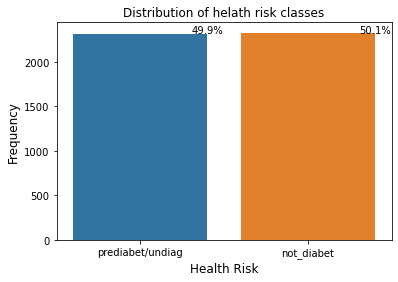

not_diabet          2325
prediabet/undiag    2315
Name: case2_diabet, dtype: int64

In [9]:
# Class distribution for health_risk 
total = float(len(df['case2_diabet']))
ax=sns.countplot(x='case2_diabet', data=df, )
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Distribution of helath risk classes')
plt.xlabel('Health Risk', size=12)
plt.ylabel('Frequency', size=12)
plt.show()
df.case2_diabet.value_counts()

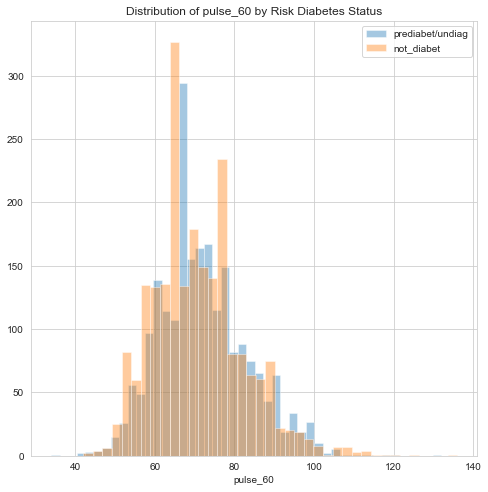

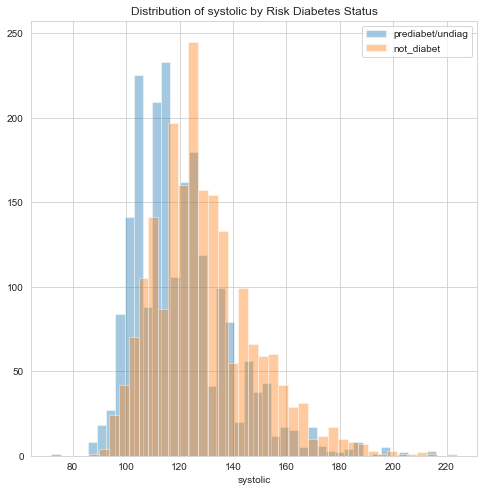

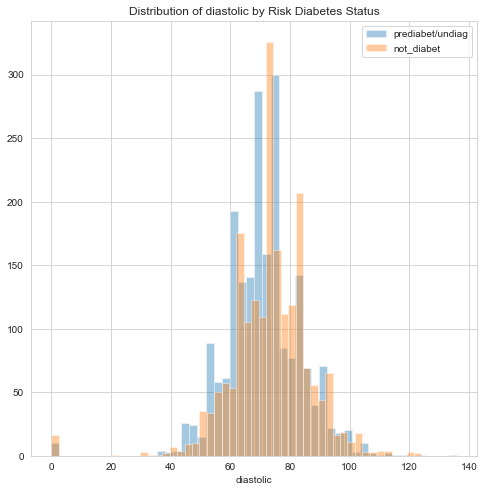

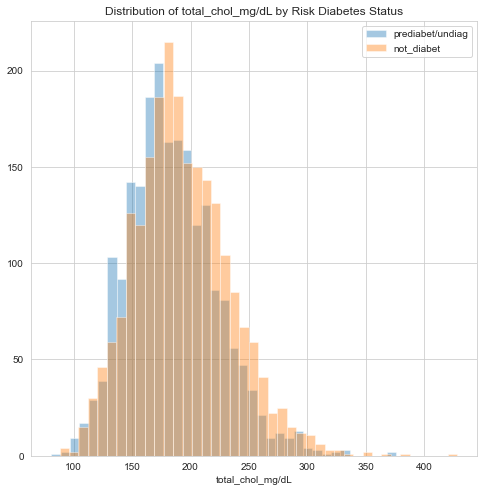

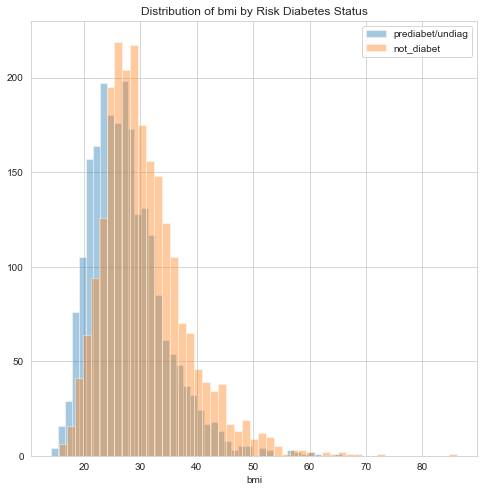

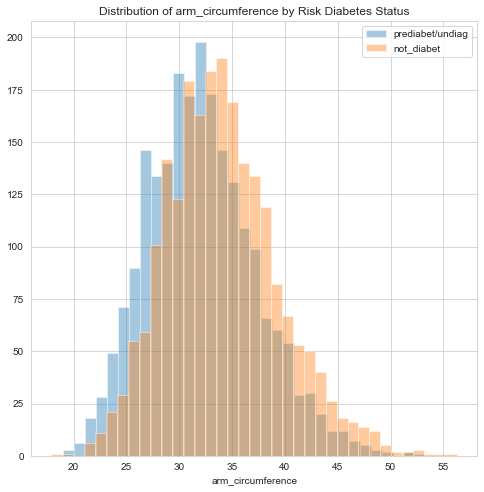

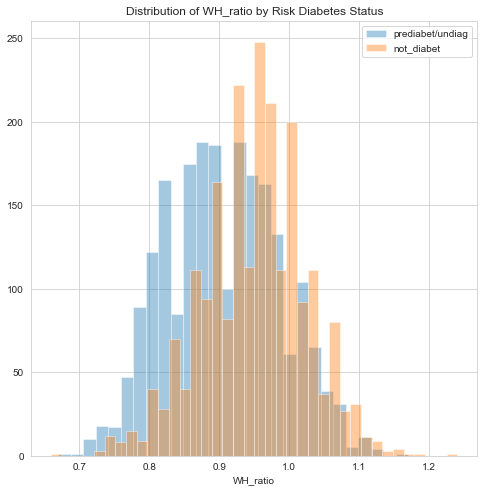

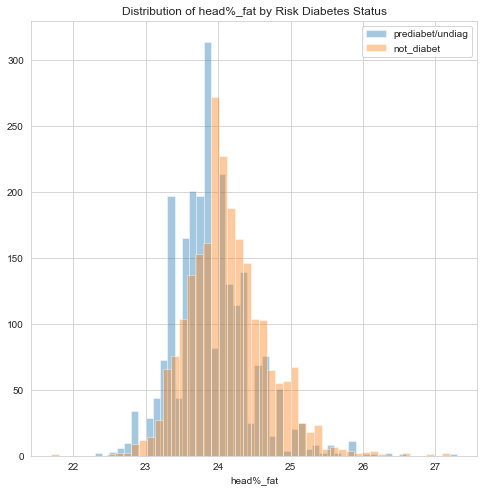

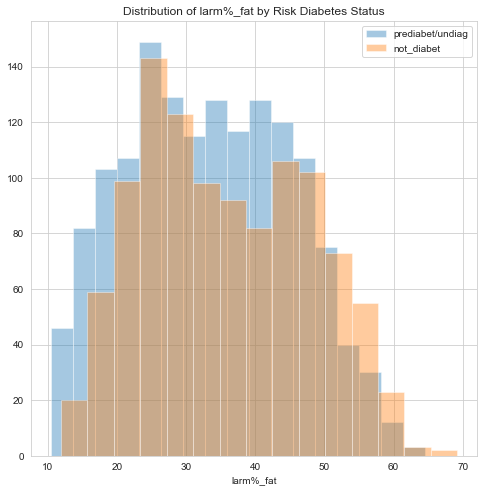

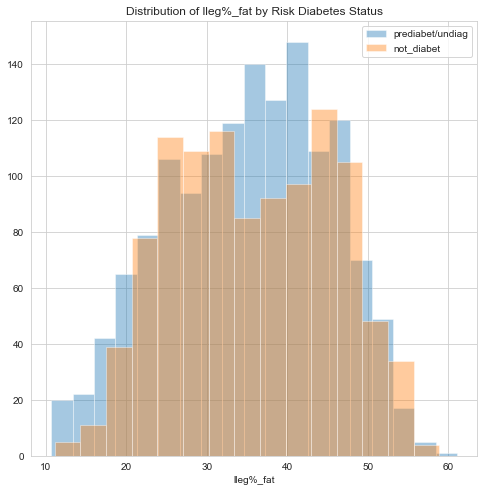

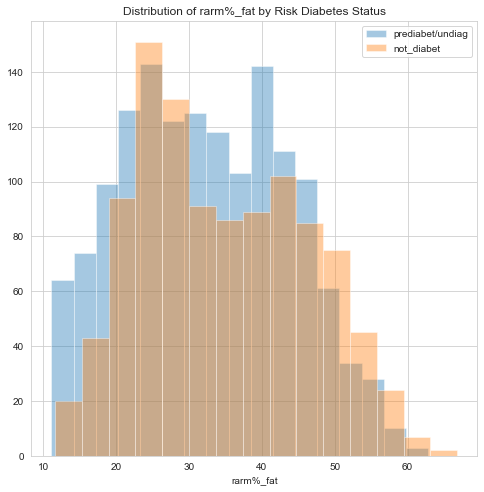

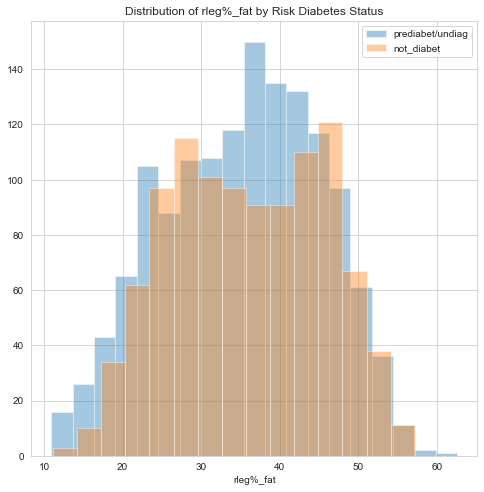

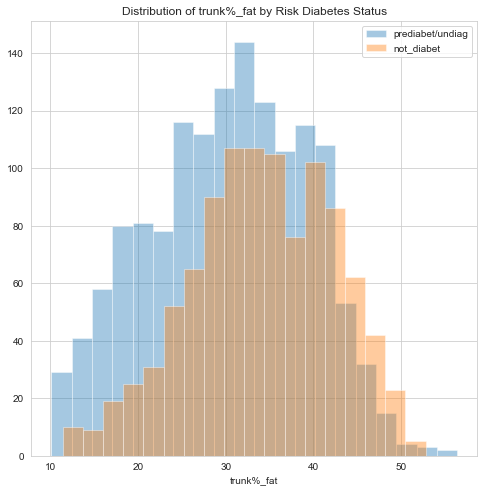

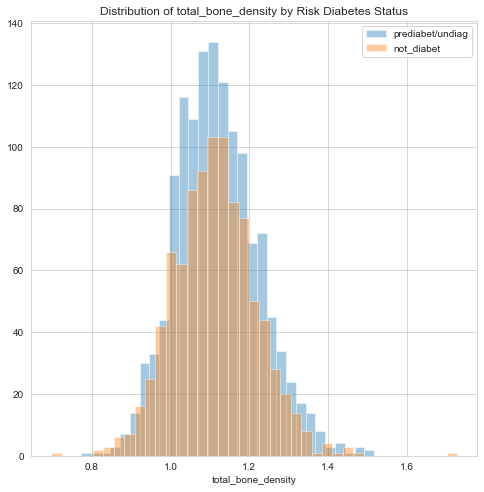

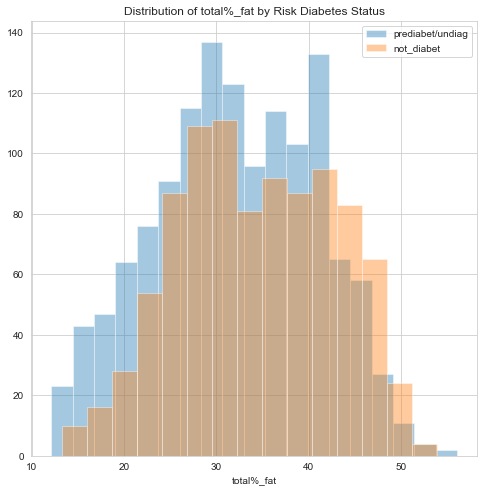

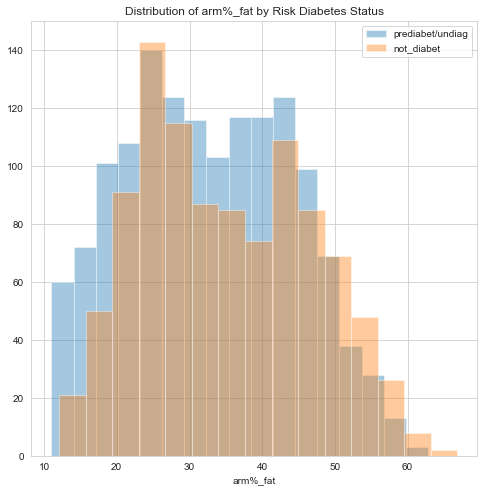

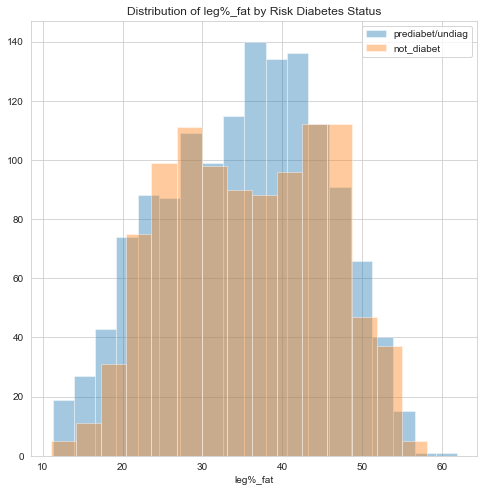

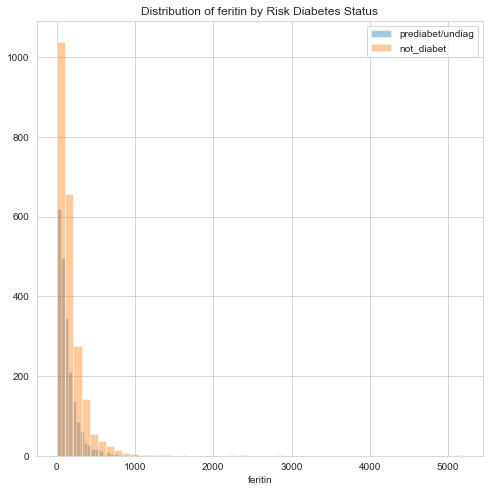

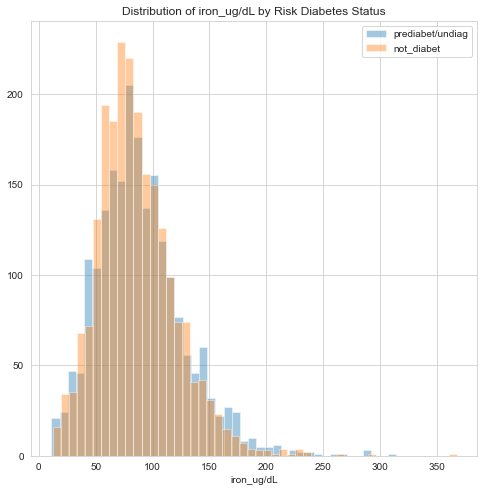

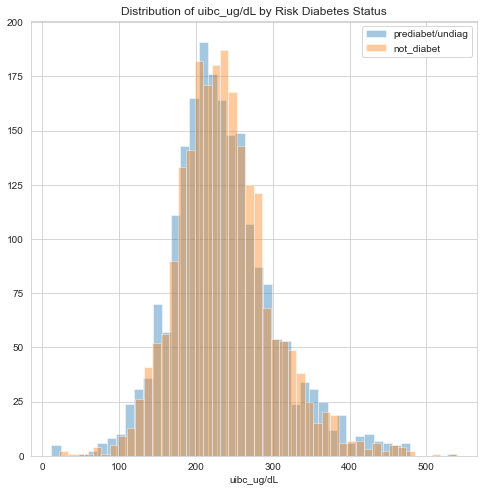

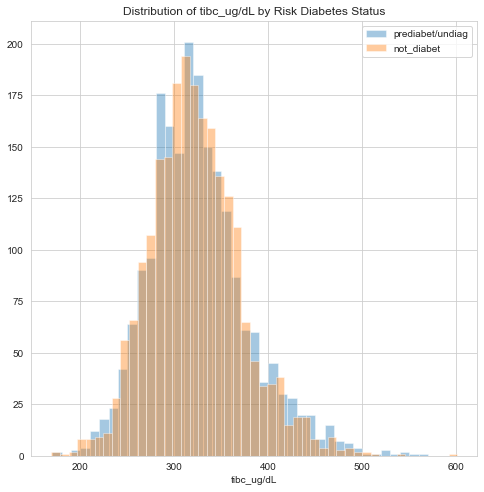

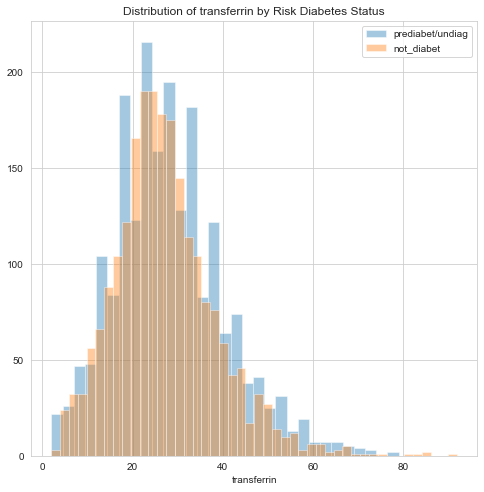

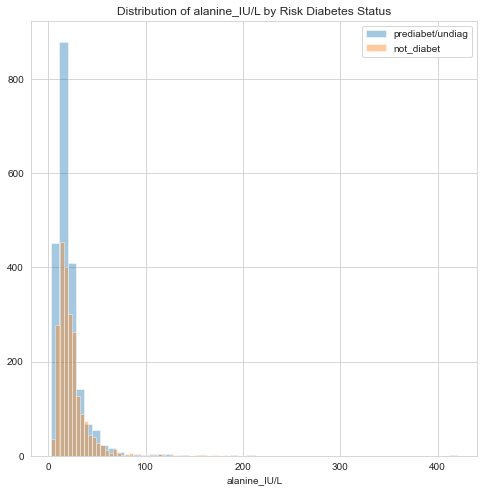

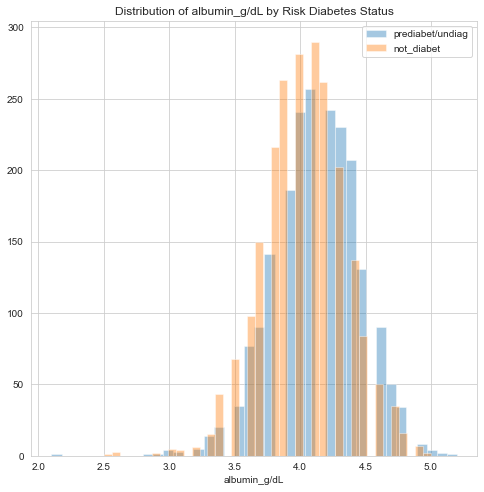

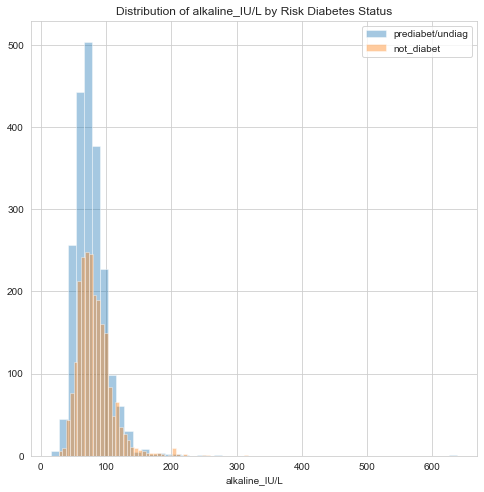

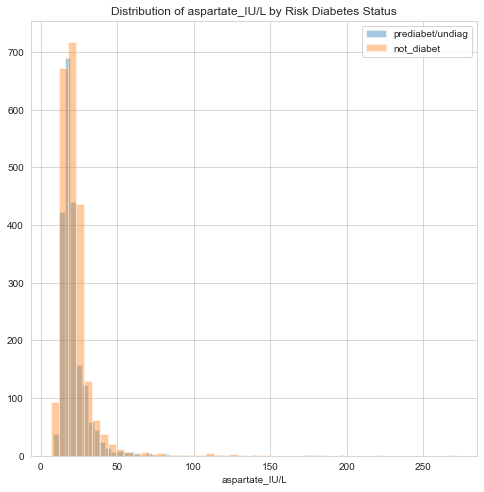

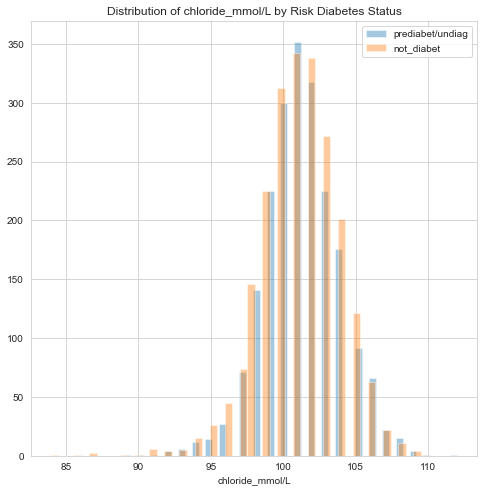

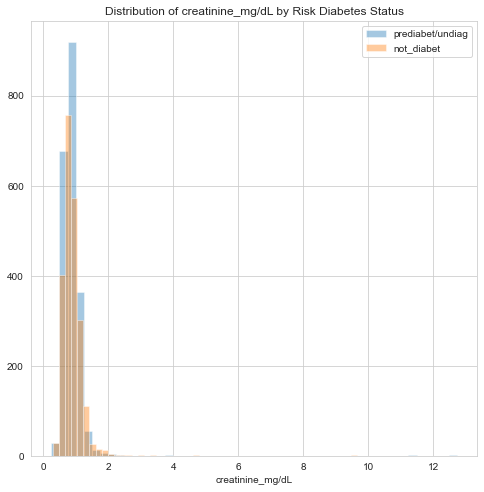

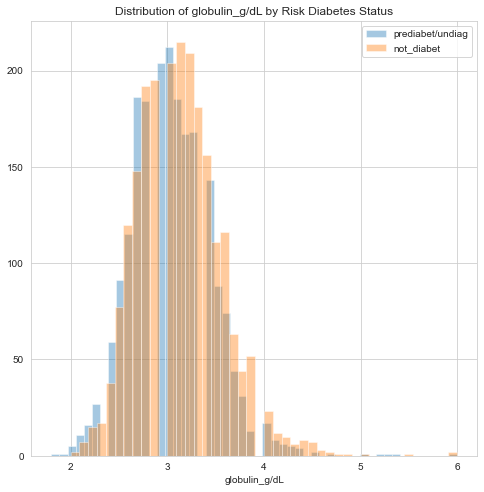

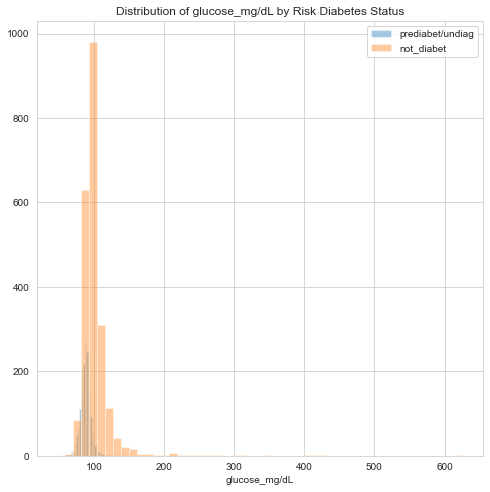

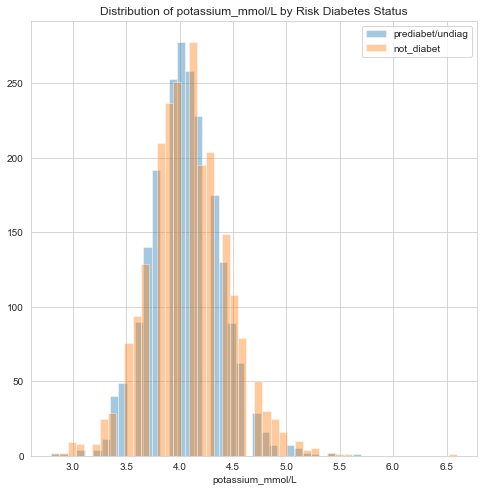

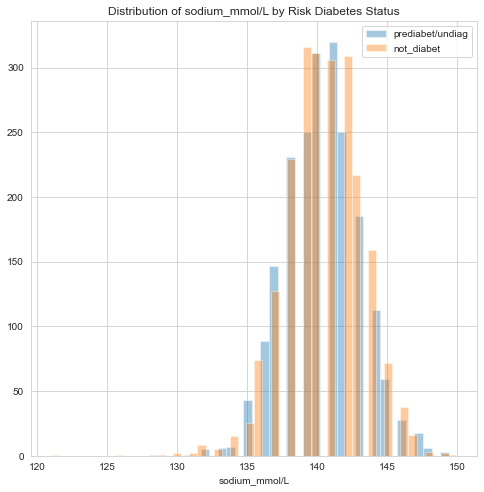

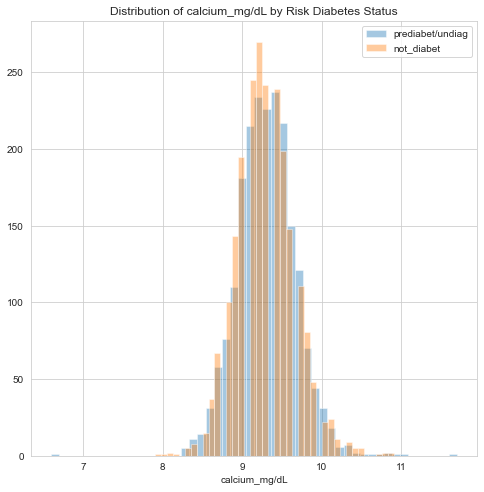

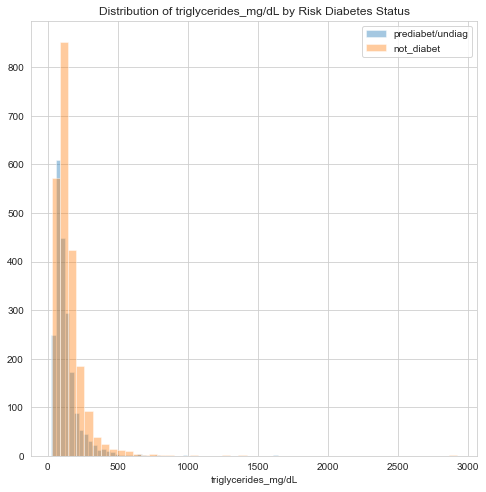

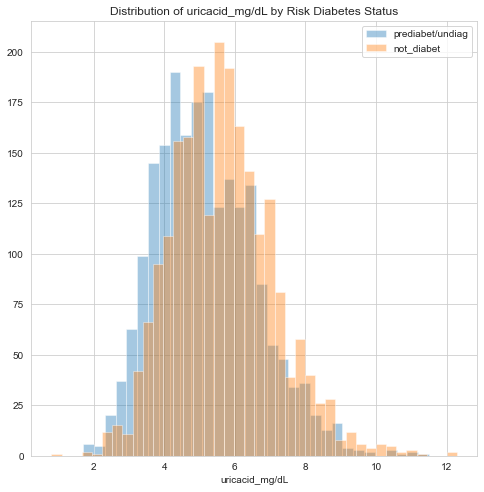

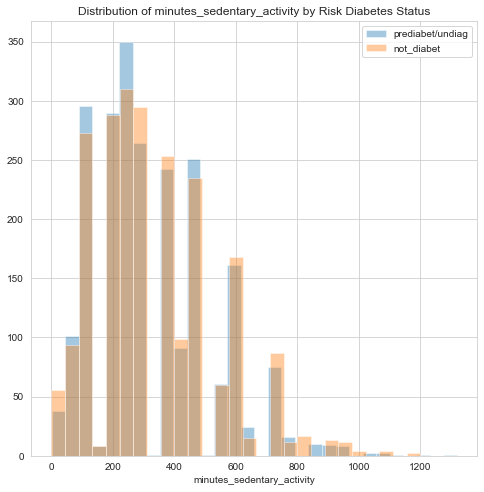

In [10]:
for i in numerical_columns:
    plt.figure(figsize=(8,8))
    sns.set_style('whitegrid')
    sns.distplot(df[df['case2_diabet']=='not_diabet'][i], kde=False)
    sns.distplot(df[df['case2_diabet']=='prediabet/undiag'][i], kde=False)
    plt.legend(df['case2_diabet'].unique())
    plt.title ('Distribution of {} by Risk Diabetes Status'.format(i))
    plt.show()

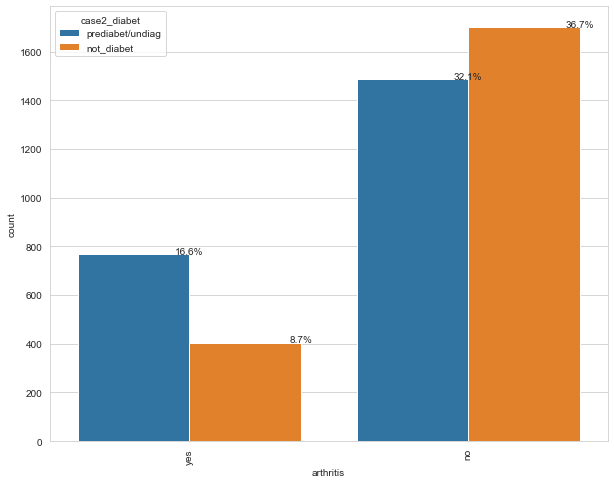

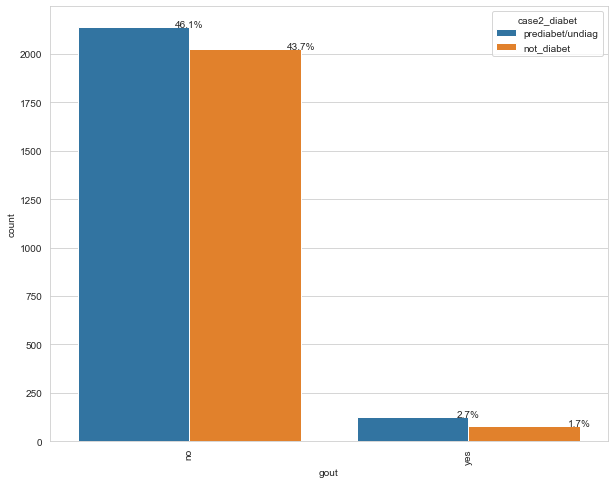

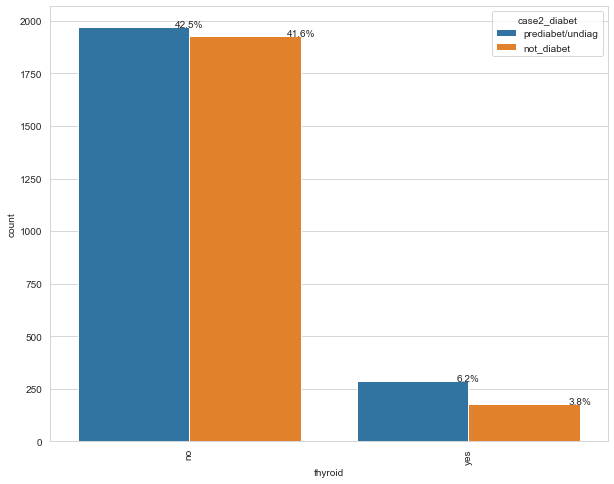

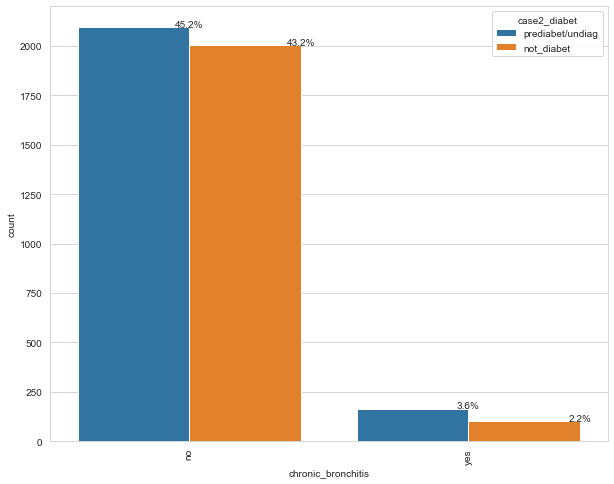

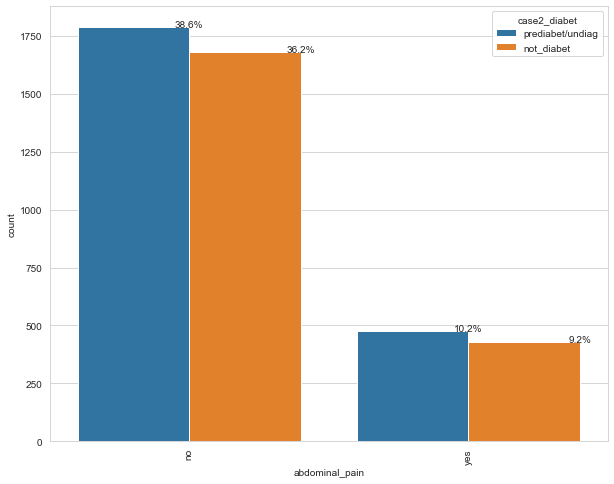

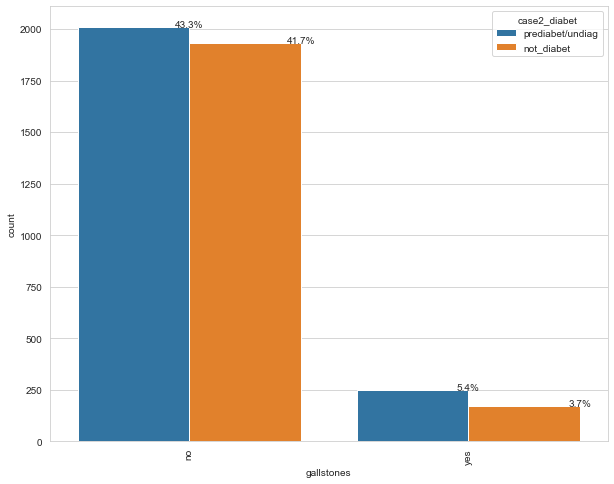

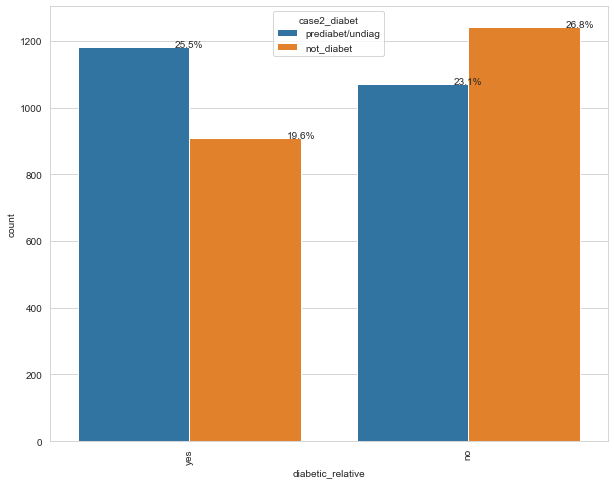

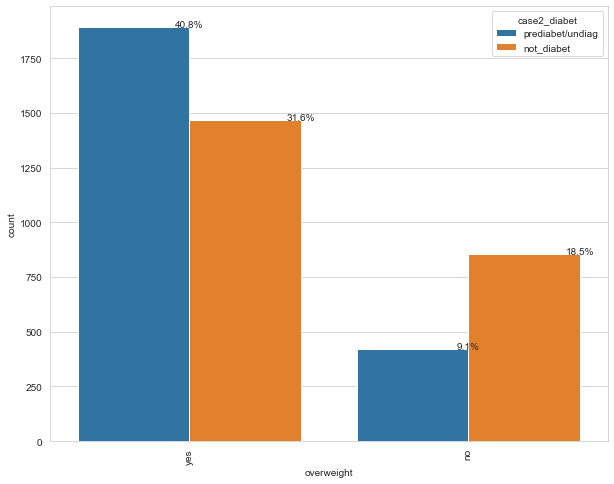

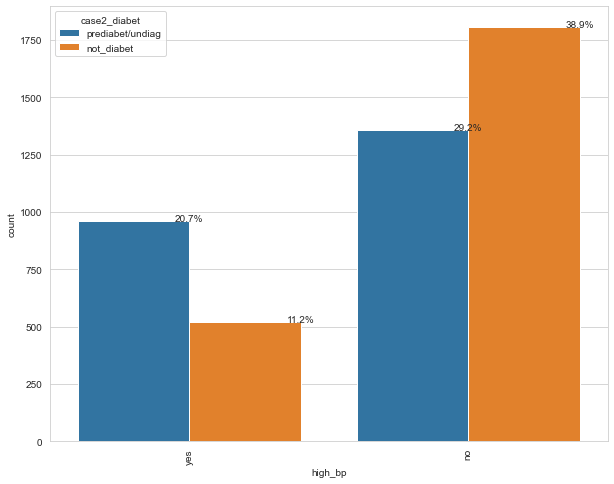

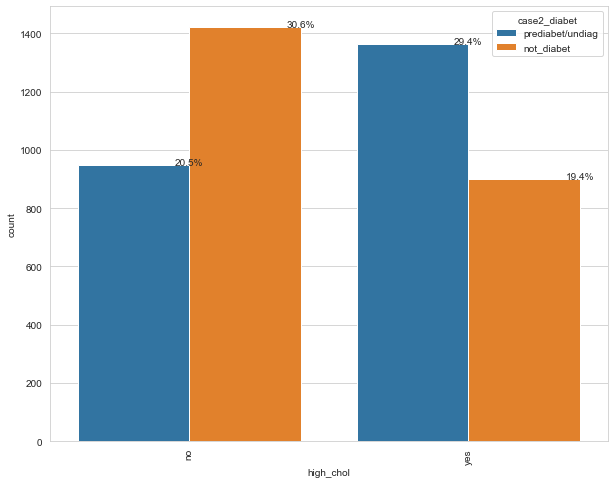

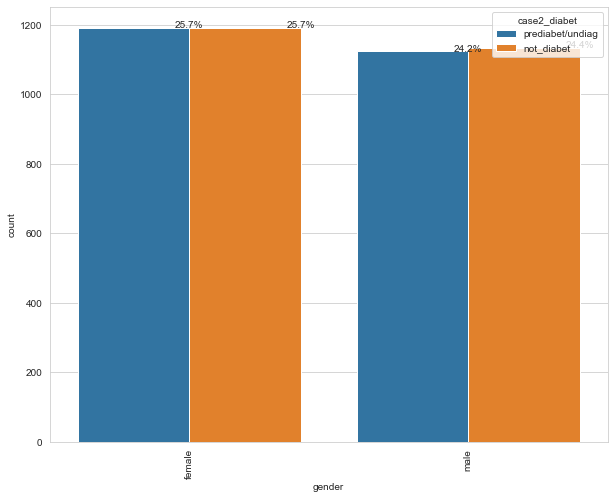

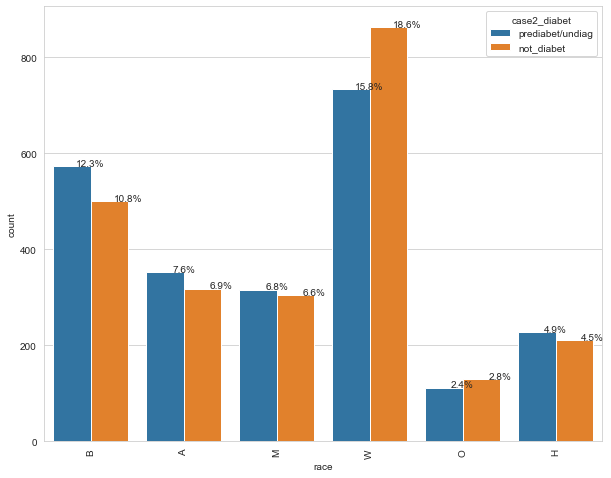

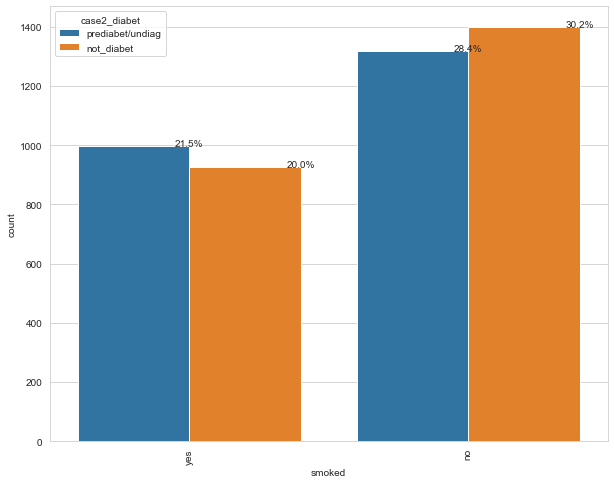

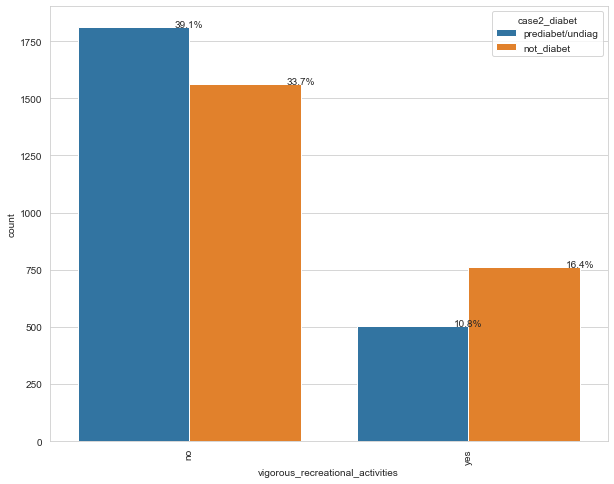

In [11]:
total = float(len(df['case2_diabet']))
for i in categorical_columns:
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    ax = sns.countplot(x = i, data=df[['case2_diabet',i]], hue='case2_diabet')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=90)
    plt.show()

### Feature Selection

,Total missing data,Percentage
total%_fat,2362.0,50.905172
total_bone_density,2357.0,50.797414
leg%_fat,2226.0,47.974138
trunk%_fat,2196.0,47.327586
arm%_fat,2195.0,47.306034
rleg%_fat,2174.0,46.853448
lleg%_fat,2138.0,46.077586
rarm%_fat,2132.0,45.948276
larm%_fat,2069.0,44.590517
systolic,525.0,11.314655


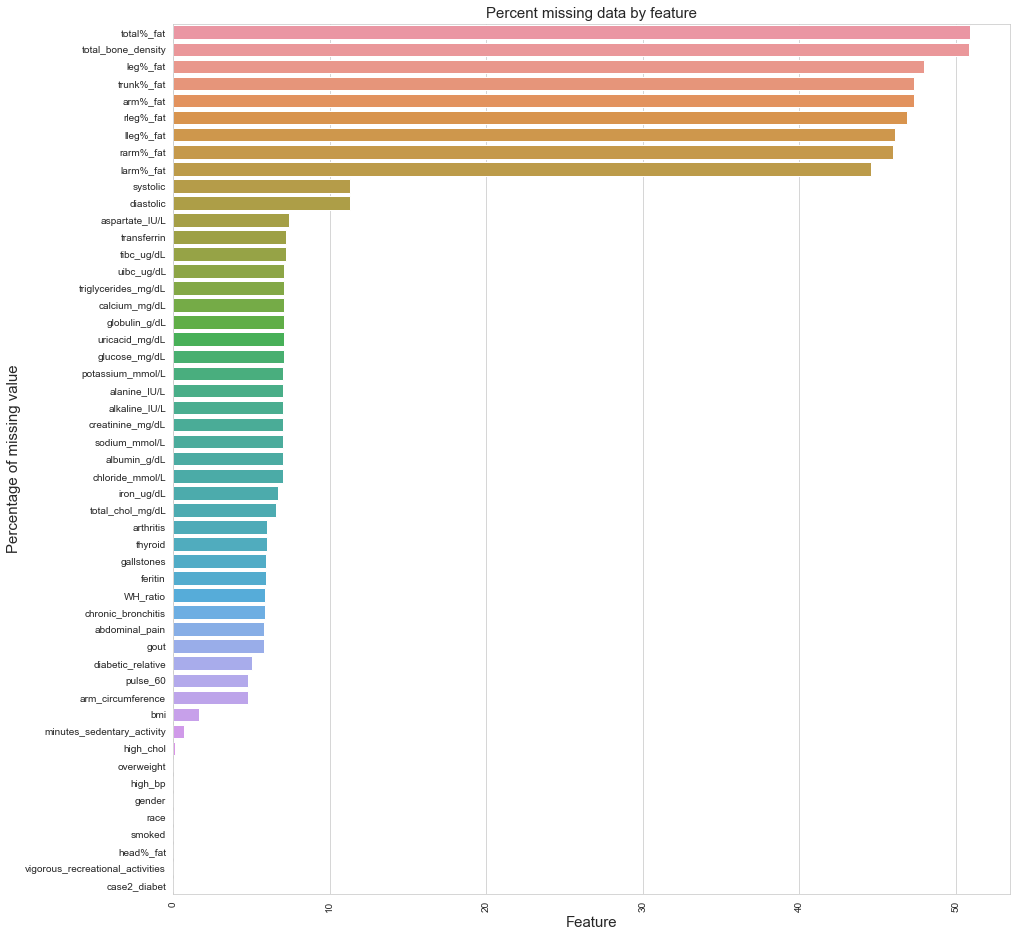

In [12]:
# Total missing data
total = df.isnull().sum().sort_values(ascending=False)

# Percentage missing data
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

# Tabel Missing Data
missing_data = pd.concat([total, percent],axis=1, keys=['Total missing data', 'Percentage'])
tabel_md = missing_data[missing_data > 0].head(50).dropna()

# Graph Missing Data
fig, ax = plt.subplots(figsize=(15,16))
plt.xticks(rotation='90')
sns.barplot(y=missing_data.index, x=missing_data['Percentage'])
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percentage of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

tabel_md

In [13]:
tabel_md[tabel_md.Percentage > 40].index

Index(['total%_fat', 'total_bone_density', 'leg%_fat', 'trunk%_fat',
       'arm%_fat', 'rleg%_fat', 'lleg%_fat', 'rarm%_fat', 'larm%_fat'],
      dtype='object')

In [14]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1514 entries, 4 to 5473
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      1514 non-null   object 
 1   arthritis                         1514 non-null   object 
 2   gout                              1514 non-null   object 
 3   thyroid                           1514 non-null   object 
 4   chronic_bronchitis                1514 non-null   object 
 5   abdominal_pain                    1514 non-null   object 
 6   gallstones                        1514 non-null   object 
 7   diabetic_relative                 1514 non-null   object 
 8   overweight                        1514 non-null   object 
 9   high_bp                           1514 non-null   object 
 10  high_chol                         1514 non-null   object 
 11  pulse_60                          1514 non-null   float64
 12  systol

#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [15]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [16]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df[i], df['case2_diabet']))
CramersV= pd.DataFrame(data=[categorical_columns, cramers]).T
CramersV.columns= ['Column', 'CramersV']
CramersV.sort_values(by='CramersV', ascending=False)
CramersV

,Column,CramersV
0,arthritis,0.16574
1,gout,0.0366765
2,thyroid,0.0694564
3,chronic_bronchitis,0.0480173
4,abdominal_pain,0
5,gallstones,0.0457431
6,diabetic_relative,0.100825
7,overweight,0.207932
8,high_bp,0.204538
9,high_chol,0.201221


In [17]:
CramersV[CramersV.CramersV < 0.1].values[:,0]

array(['gout', 'thyroid', 'chronic_bronchitis', 'abdominal_pain',
       'gallstones', 'gender', 'race', 'smoked'], dtype=object)

##### Delete columns cramersV < 0.1 

In [18]:
df.drop(columns=CramersV[CramersV.CramersV < 0.1].values[:,0], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [19]:
df.columns

Index(['case2_diabet', 'arthritis', 'diabetic_relative', 'overweight',
       'high_bp', 'high_chol', 'pulse_60', 'systolic', 'diastolic',
       'total_chol_mg/dL', 'bmi', 'arm_circumference', 'WH_ratio', 'head%_fat',
       'larm%_fat', 'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',
       'total_bone_density', 'total%_fat', 'arm%_fat', 'leg%_fat', 'feritin',
       'iron_ug/dL', 'uibc_ug/dL', 'tibc_ug/dL', 'transferrin', 'alanine_IU/L',
       'albumin_g/dL', 'alkaline_IU/L', 'aspartate_IU/L', 'chloride_mmol/L',
       'creatinine_mg/dL', 'globulin_g/dL', 'glucose_mg/dL',
       'potassium_mmol/L', 'sodium_mmol/L', 'calcium_mg/dL',
       'triglycerides_mg/dL', 'uricacid_mg/dL',
       'vigorous_recreational_activities', 'minutes_sedentary_activity'],
      dtype='object')

#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [20]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [21]:
corr_ratio = []
for i in numerical_columns:
    corr_ratio.append(correlation_ratio(df['case2_diabet'], df[i]))
    
Corr = pd.DataFrame(data=[numerical_columns, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

,Column,Corr_Ratio
29,glucose_mg/dL,0.325645
6,WH_ratio,0.323757
4,bmi,0.267633
7,head%_fat,0.25765
5,arm_circumference,0.247226
1,systolic,0.219072
12,trunk%_fat,0.193672
34,uricacid_mg/dL,0.19227
3,total_chol_mg/dL,0.168426
33,triglycerides_mg/dL,0.165057


In [22]:
Corr[Corr.Corr_Ratio < 0.2].iloc[:,0].values

array(['pulse_60', 'diastolic', 'total_chol_mg/dL', 'larm%_fat',
       'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',
       'total_bone_density', 'total%_fat', 'arm%_fat', 'leg%_fat',
       'feritin', 'iron_ug/dL', 'uibc_ug/dL', 'tibc_ug/dL', 'transferrin',
       'alanine_IU/L', 'albumin_g/dL', 'alkaline_IU/L', 'aspartate_IU/L',
       'chloride_mmol/L', 'creatinine_mg/dL', 'globulin_g/dL',
       'potassium_mmol/L', 'sodium_mmol/L', 'calcium_mg/dL',
       'triglycerides_mg/dL', 'uricacid_mg/dL',
       'minutes_sedentary_activity'], dtype=object)

#### Delete columns Corr_ratio < 0.1

In [23]:
df.drop(columns=Corr[Corr.Corr_Ratio < 0.2].iloc[:,0].values, axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      1517 non-null   object 
 1   arthritis                         1517 non-null   object 
 2   diabetic_relative                 1517 non-null   object 
 3   overweight                        1517 non-null   object 
 4   high_bp                           1517 non-null   object 
 5   high_chol                         1517 non-null   object 
 6   systolic                          1517 non-null   float64
 7   bmi                               1517 non-null   float64
 8   arm_circumference                 1517 non-null   float64
 9   WH_ratio                          1517 non-null   float64
 10  head%_fat                         1517 non-null   float64
 11  glucose_mg/dL                     1517 non-null   float64
 12  vigoro

#### Iteration-2

In [25]:
df.columns.values

array(['case2_diabet', 'arthritis', 'diabetic_relative', 'overweight',
       'high_bp', 'high_chol', 'systolic', 'bmi', 'arm_circumference',
       'WH_ratio', 'head%_fat', 'glucose_mg/dL',
       'vigorous_recreational_activities'], dtype=object)

In [26]:
df = data[df.columns.values]

,Total missing data,Percentage
case2_diabet,838.0,15.297554
systolic,630.0,11.500548
glucose_mg/dL,373.0,6.809054
WH_ratio,350.0,6.389193
arthritis,283.0,5.166119
arm_circumference,278.0,5.074845
diabetic_relative,259.0,4.728003
bmi,99.0,1.807229
high_chol,6.0,0.109529
overweight,1.0,0.018255


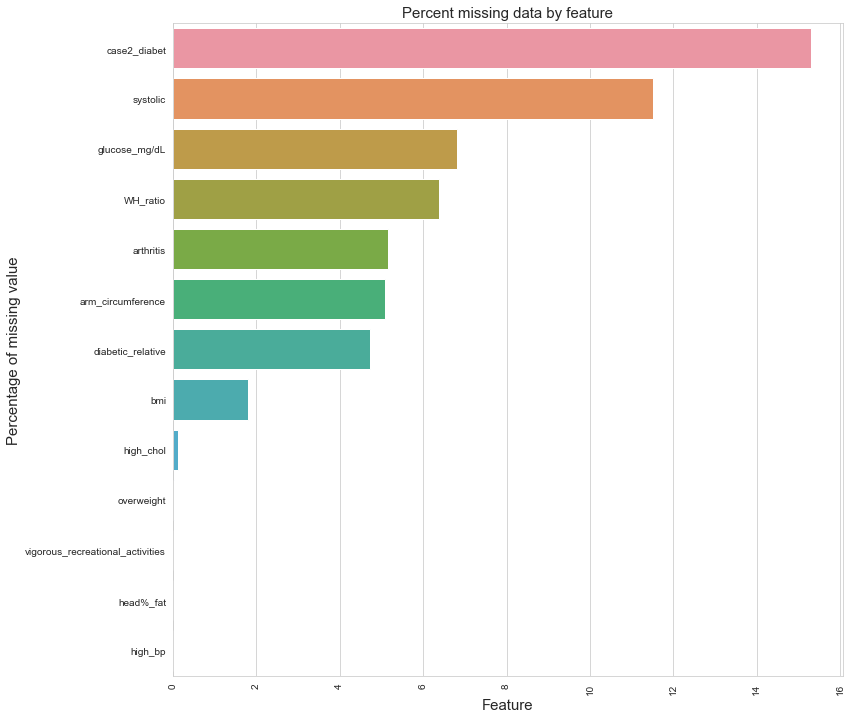

In [27]:
# Total missing data
total = df.isnull().sum().sort_values(ascending=False)

# Percentage missing data
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

# Tabel Missing Data
missing_data = pd.concat([total, percent],axis=1, keys=['Total missing data', 'Percentage'])
tabel_md = missing_data[missing_data > 0].head(50).dropna()

# Graph Missing Data
fig, ax = plt.subplots(figsize=(12,12))
plt.xticks(rotation='90')
sns.barplot(y=missing_data.index, x=missing_data['Percentage'])
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percentage of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

tabel_md

#### Delete columns missing_value > 50%

In [28]:
#df.drop(columns=['head%_fat'], axis=1, inplace=True)
df.dropna()

,case2_diabet,arthritis,diabetic_relative,overweight,high_bp,high_chol,systolic,bmi,arm_circumference,WH_ratio,head%_fat,glucose_mg/dL,vigorous_recreational_activities
3,prediabet/undiag,yes,yes,yes,yes,no,120.0,38.9,38.1,0.86,24.789619,96.0,no
4,prediabet/undiag,no,no,no,no,yes,108.0,21.3,30.8,0.95,23.500000,98.0,yes
6,not_diabet,yes,no,no,no,no,104.0,23.5,30.6,1.10,23.716200,91.0,no
8,prediabet/undiag,yes,yes,no,no,yes,112.0,22.5,30.8,0.96,24.046493,96.0,yes
9,not_diabet,yes,no,yes,no,yes,120.0,30.7,34.2,1.00,24.448494,94.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,prediabet/undiag,no,no,no,no,yes,120.0,23.7,32.9,0.87,23.900000,96.0,no
5474,prediabet/undiag,no,no,no,no,no,136.0,20.0,25.1,0.94,22.967715,150.0,no
5475,prediabet/undiag,no,no,yes,no,yes,124.0,35.8,40.6,1.02,24.627419,101.0,no
5476,not_diabet,no,yes,yes,no,no,116.0,26.1,26.8,0.84,22.900000,88.0,no


In [29]:
#df.dropna(inplace=True)
#df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      4640 non-null   object 
 1   arthritis                         5195 non-null   object 
 2   diabetic_relative                 5219 non-null   object 
 3   overweight                        5477 non-null   object 
 4   high_bp                           5478 non-null   object 
 5   high_chol                         5472 non-null   object 
 6   systolic                          4848 non-null   float64
 7   bmi                               5379 non-null   float64
 8   arm_circumference                 5200 non-null   float64
 9   WH_ratio                          5128 non-null   float64
 10  head%_fat                         5478 non-null   float64
 11  glucose_mg/dL                     5105 non-null   float64
 12  vigoro

In [30]:
categorical = df.drop(['case2_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [31]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df[i], df['case2_diabet']))
CramersV= pd.DataFrame(data=[categorical_columns, cramers]).T
CramersV.columns= ['Column', 'CramersV']
CramersV.sort_values(by='CramersV', ascending=False)
CramersV

,Column,CramersV
0,arthritis,0.16574
1,diabetic_relative,0.100825
2,overweight,0.207932
3,high_bp,0.204538
4,high_chol,0.201221
5,vigorous_recreational_activities,0.122683


In [32]:
CramersV[CramersV.CramersV < 0.12].values[:,0]

array(['diabetic_relative'], dtype=object)

##### Delete columns cramersV < 0.12 

In [33]:
df.drop(columns=CramersV[CramersV.CramersV < 0.12].values[:,0], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [34]:
corr_ratio = []
for i in numerical_columns:
    corr_ratio.append(correlation_ratio(df['case2_diabet'], df[i]))
    
Corr = pd.DataFrame(data=[numerical_columns, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

,Column,Corr_Ratio
5,glucose_mg/dL,0.310069
3,WH_ratio,0.263341
4,head%_fat,0.215751
0,systolic,0.214407
1,bmi,0.204284
2,arm_circumference,0.172928


#### Delete columns Corr_ratio < 0.2

In [35]:
df.drop(columns=Corr[Corr.Corr_Ratio < 0.2].iloc[:,0].values, axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [36]:
df.columns.values

array(['case2_diabet', 'arthritis', 'overweight', 'high_bp', 'high_chol',
       'systolic', 'bmi', 'WH_ratio', 'head%_fat', 'glucose_mg/dL',
       'vigorous_recreational_activities'], dtype=object)

In [37]:
df = data[df.columns.values]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      4640 non-null   object 
 1   arthritis                         5195 non-null   object 
 2   overweight                        5477 non-null   object 
 3   high_bp                           5478 non-null   object 
 4   high_chol                         5472 non-null   object 
 5   systolic                          4848 non-null   float64
 6   bmi                               5379 non-null   float64
 7   WH_ratio                          5128 non-null   float64
 8   head%_fat                         5478 non-null   float64
 9   glucose_mg/dL                     5105 non-null   float64
 10  vigorous_recreational_activities  5478 non-null   object 
dtypes: float64(5), object(6)
memory usage: 470.9+ KB


In [38]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      3495 non-null   object 
 1   arthritis                         3495 non-null   object 
 2   overweight                        3495 non-null   object 
 3   high_bp                           3495 non-null   object 
 4   high_chol                         3495 non-null   object 
 5   systolic                          3495 non-null   float64
 6   bmi                               3495 non-null   float64
 7   WH_ratio                          3495 non-null   float64
 8   head%_fat                         3495 non-null   float64
 9   glucose_mg/dL                     3495 non-null   float64
 10  vigorous_recreational_activities  3495 non-null   object 
dtypes: float64(5), object(6)
memory usage: 300.5+ KB


In [39]:
categorical = df.drop(['case2_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

#### Check Categorical Column using Chi Squared

In [40]:
categorical = df.drop(['case2_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

In [41]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical:
    if chi2_contingency(
            pd.crosstab(df['case2_diabet'],
                        df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data=[categorical_columns, chi2_check]
                   ).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,arthritis,Reject Null Hypothesis
1,overweight,Reject Null Hypothesis
2,high_bp,Reject Null Hypothesis
3,high_chol,Reject Null Hypothesis
4,vigorous_recreational_activities,Reject Null Hypothesis


Hypothesis Testing : 
- H0 : There is no association between feature and risk diabetes.
- H1 : There is an association between feature and risk diabetes.

Significance level : 5%

#### Check Dummies in Categorical Column which Reject Null Hypothesis by using Chi Squared

In [42]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.0005/df[i].nunique() 
#     changing the critical value depend on the nuniqueu value in each features
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['case2_diabet'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
            
res_chi = pd.DataFrame(data = [list(check.keys()), list(check.values())]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,arthritis+no,Reject Null Hypothesis
1,arthritis+yes,Reject Null Hypothesis
2,overweight+no,Reject Null Hypothesis
3,overweight+yes,Reject Null Hypothesis
4,high_bp+no,Reject Null Hypothesis
5,high_bp+yes,Reject Null Hypothesis
6,high_chol+no,Reject Null Hypothesis
7,high_chol+yes,Reject Null Hypothesis
8,vigorous_recreational_activities+no,Reject Null Hypothesis
9,vigorous_recreational_activities+yes,Reject Null Hypothesis


In [43]:
res_chi[res_chi['Hypothesis'] != 'Reject Null Hypothesis']

,Pair,Hypothesis


Hypothesis Testing : 
- H0 : Two samples come from the same population (same median).
- H1 : Two samples not come from the same population/ sample tend to be larger than observations in the other

Significance level : 5%

#### Check Numerical Column using Mannwhitney U

In [44]:
from scipy.stats import mannwhitneyu
mann = []
for i in numerical_columns:
    if mannwhitneyu(df[df['case2_diabet'] == 'prediabet/undiag'][i],
                    df[df['case2_diabet'] == 'not_diabet'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res_mann = pd.DataFrame(
    data=[list(numerical_columns), mann]).T
res_mann.columns = ['Columns', 'Hypothesis']
res_mann

,Columns,Hypothesis
0,systolic,Reject Null Hypothesis
1,bmi,Reject Null Hypothesis
2,WH_ratio,Reject Null Hypothesis
3,head%_fat,Reject Null Hypothesis
4,glucose_mg/dL,Reject Null Hypothesis


In [45]:
df.columns.values

array(['case2_diabet', 'arthritis', 'overweight', 'high_bp', 'high_chol',
       'systolic', 'bmi', 'WH_ratio', 'head%_fat', 'glucose_mg/dL',
       'vigorous_recreational_activities'], dtype=object)

In [46]:
df = data[df.columns.values]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      4640 non-null   object 
 1   arthritis                         5195 non-null   object 
 2   overweight                        5477 non-null   object 
 3   high_bp                           5478 non-null   object 
 4   high_chol                         5472 non-null   object 
 5   systolic                          4848 non-null   float64
 6   bmi                               5379 non-null   float64
 7   WH_ratio                          5128 non-null   float64
 8   head%_fat                         5478 non-null   float64
 9   glucose_mg/dL                     5105 non-null   float64
 10  vigorous_recreational_activities  5478 non-null   object 
dtypes: float64(5), object(6)
memory usage: 470.9+ KB


In [47]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case2_diabet                      3495 non-null   object 
 1   arthritis                         3495 non-null   object 
 2   overweight                        3495 non-null   object 
 3   high_bp                           3495 non-null   object 
 4   high_chol                         3495 non-null   object 
 5   systolic                          3495 non-null   float64
 6   bmi                               3495 non-null   float64
 7   WH_ratio                          3495 non-null   float64
 8   head%_fat                         3495 non-null   float64
 9   glucose_mg/dL                     3495 non-null   float64
 10  vigorous_recreational_activities  3495 non-null   object 
dtypes: float64(5), object(6)
memory usage: 300.5+ KB


#### Setting traget and features

In [48]:
# Define random_state; we will use it through the notebook
random_state = 101

In [49]:
df['case2_diabet'].replace({'not_diabet':0,'prediabet/undiag':1},inplace=True)
df.case2_diabet.value_counts()

1    1847
0    1648
Name: case2_diabet, dtype: int64

In [50]:
target = df['case2_diabet']
features = df.drop(['case2_diabet'], axis=1)

In [51]:
numerical =  df.drop(['case2_diabet'],axis=1).select_dtypes('number')
categorical = df.select_dtypes('object')

In [52]:
categorical.columns.values

array(['arthritis', 'overweight', 'high_bp', 'high_chol',
       'vigorous_recreational_activities'], dtype=object)

In [53]:
features = pd.get_dummies(data=features, columns=categorical.columns.values, drop_first=True)

In [54]:
### Default Parameter
from sklearn.model_selection import train_test_split
#### split data
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    random_state=random_state, stratify=target)

In [55]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

2621 874 2621 874


#### Modelling

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve

In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear",random_state=random_state)
log_model = log.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[305 107]
 [101 361]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       412
           1       0.77      0.78      0.78       462

    accuracy                           0.76       874
   macro avg       0.76      0.76      0.76       874
weighted avg       0.76      0.76      0.76       874



In [58]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear",random_state=random_state).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))


[[309 103]
 [104 358]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       412
           1       0.78      0.77      0.78       462

    accuracy                           0.76       874
   macro avg       0.76      0.76      0.76       874
weighted avg       0.76      0.76      0.76       874



In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=random_state).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[303 109]
 [114 348]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       412
           1       0.76      0.75      0.76       462

    accuracy                           0.74       874
   macro avg       0.74      0.74      0.74       874
weighted avg       0.75      0.74      0.74       874



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=random_state).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[314  98]
 [117 345]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       412
           1       0.78      0.75      0.76       462

    accuracy                           0.75       874
   macro avg       0.75      0.75      0.75       874
weighted avg       0.76      0.75      0.75       874



In [61]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[297 115]
 [123 339]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       412
           1       0.75      0.73      0.74       462

    accuracy                           0.73       874
   macro avg       0.73      0.73      0.73       874
weighted avg       0.73      0.73      0.73       874



In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = ada_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[326  86]
 [128 334]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       412
           1       0.80      0.72      0.76       462

    accuracy                           0.76       874
   macro avg       0.76      0.76      0.76       874
weighted avg       0.76      0.76      0.76       874



In [63]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[290 122]
 [119 343]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       412
           1       0.74      0.74      0.74       462

    accuracy                           0.72       874
   macro avg       0.72      0.72      0.72       874
weighted avg       0.72      0.72      0.72       874



In [64]:
models = [
    log_model,
    svm_model,
    rf_model,
    gbm_model,
    lgbm_model,
    xgb_model,
    ada_model
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    recall = recall_score(y_test, y_pred)
    print("Recall: {:.4%}".format(recall))

----------------------------
LogisticRegression:
Accuracy: 76.2014%
Recall: 78.1385%
----------------------------
SVC:
Accuracy: 76.3158%
Recall: 77.4892%
----------------------------
RandomForestClassifier:
Accuracy: 74.4851%
Recall: 75.3247%
----------------------------
GradientBoostingClassifier:
Accuracy: 75.4005%
Recall: 74.6753%
----------------------------
LGBMClassifier:
Accuracy: 72.7689%
Recall: 73.3766%
----------------------------
XGBClassifier:
Accuracy: 72.4256%
Recall: 74.2424%
----------------------------
AdaBoostClassifier:
Accuracy: 75.5149%
Recall: 72.2944%


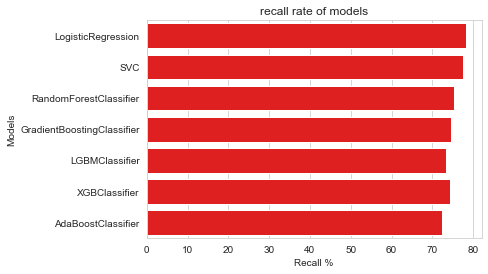

In [65]:
result = []

results = pd.DataFrame(columns= ["Models","Recall"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)    
    result = pd.DataFrame([[name, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
    
    
sns.barplot(x= 'Recall', y = 'Models', data=results, color="r")
plt.xlabel('Recall %')
plt.title('recall rate of models'); 

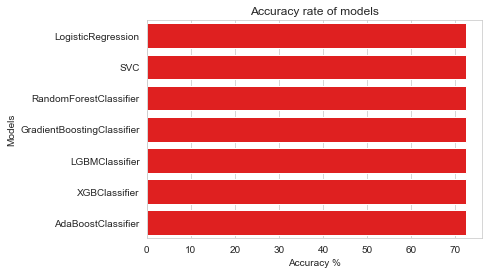

In [66]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[name, recall*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy rate of models'); 

----------------------------
LogisticRegression:


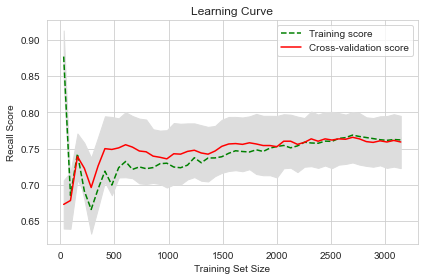

----------------------------
SVC:


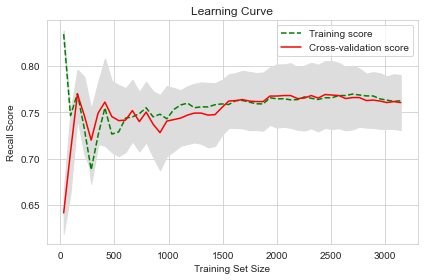

----------------------------
RandomForestClassifier:


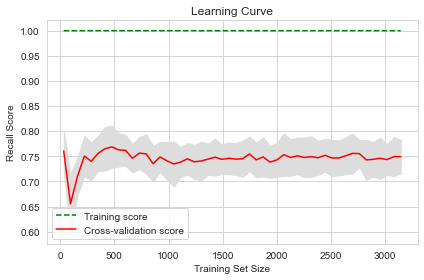

----------------------------
GradientBoostingClassifier:


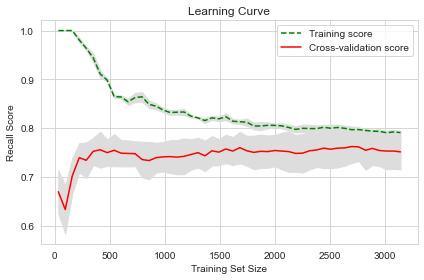

----------------------------
LGBMClassifier:


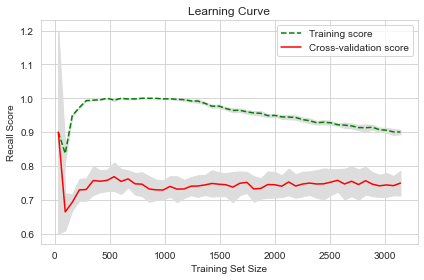

----------------------------
XGBClassifier:


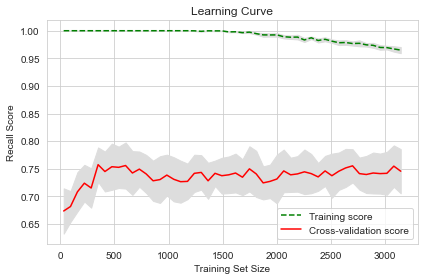

----------------------------
AdaBoostClassifier:


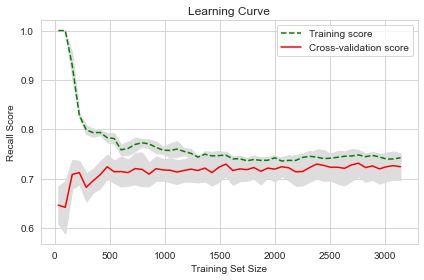

In [67]:
from sklearn.model_selection import learning_curve
#Create CV training and test scores for various training set sizes
for model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                features, target,
                                                # Number of folds in cross-validation
                                                cv=10,
                                                # Evaluation metric
                                                scoring='recall',
                                                # Use all computer cores
                                                n_jobs=-1, 
                                                # 50 different sizes of the training set
                                                train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="green",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    name = model.__class__.__name__
    print("-"*28)
    print(name + ":" )
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Recall Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


#### Dari 8 Model dipilih 3 model untuk hyperparameter tuning berdasarkan recall, accuracy dan learning curve

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

##### Model 1 - Logistic Regression

In [71]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters = {'C':[0.00002,0.00005,0.000015],}
log = LogisticRegression(penalty='l2',solver='sag', random_state=101)
tuned_lr = GridSearchCV(log,parameters, scoring='recall',n_jobs=-1,cv=cv)
tuned_lr.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=LogisticRegression(random_state=101, solver='sag'),
             n_jobs=-1, param_grid={'C': [2e-05, 5e-05, 1.5e-05]},
             scoring='recall')

In [72]:
tuned_lr.best_params_

{'C': 1.5e-05}

In [73]:
tuned_lr = LogisticRegression(penalty='l2',solver='sag', random_state=101,
                              C=1.5e-05).fit(X_train, y_train)

y_pred = tuned_lr.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = tuned_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 209 1027]
 [ 145 1240]]
              precision    recall  f1-score   support

           0       0.59      0.17      0.26      1236
           1       0.55      0.90      0.68      1385

    accuracy                           0.55      2621
   macro avg       0.57      0.53      0.47      2621
weighted avg       0.57      0.55      0.48      2621

----------------------------------------
[[ 71 341]
 [ 46 416]]
              precision    recall  f1-score   support

           0       0.61      0.17      0.27       412
           1       0.55      0.90      0.68       462

    accuracy                           0.56       874
   macro avg       0.58      0.54      0.48       874
weighted avg       0.58      0.56      0.49       874



##### Model 2 - Support Vector Mechanism

In [74]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters = { 'kernel' : ['linear'],
               'C':[0.000002,0.00002,0.0002,0.002],
             }
svc_tuned = GridSearchCV(SVC(),parameters, scoring='recall',n_jobs=-1,cv=cv)
svc_tuned.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2e-06, 2e-05, 0.0002, 0.002],
                         'kernel': ['linear']},
             scoring='recall')

In [75]:
svc_tuned.best_params_

{'C': 2e-06, 'kernel': 'linear'}

In [76]:
svc_tuned = SVC(C=2e-06,kernel='linear', probability=True).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = svc_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 559  677]
 [ 140 1245]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58      1236
           1       0.65      0.90      0.75      1385

    accuracy                           0.69      2621
   macro avg       0.72      0.68      0.67      2621
weighted avg       0.72      0.69      0.67      2621

----------------------------------------
[[171 241]
 [ 39 423]]
              precision    recall  f1-score   support

           0       0.81      0.42      0.55       412
           1       0.64      0.92      0.75       462

    accuracy                           0.68       874
   macro avg       0.73      0.67      0.65       874
weighted avg       0.72      0.68      0.66       874



##### Model 3 - Random Forest

In [83]:
parameters = {
    'n_estimators' : [5, 10, 15, 20],
    'min_samples_leaf' : [1, 3 ,6,9],
    'class_weight' : [{0.0: 1, 1.0: 3}]
}
rf_tuned = GridSearchCV(RandomForestClassifier(), parameters, cv=cv,
                             scoring='recall', n_jobs=-1)
rf_tuned.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0.0: 1, 1.0: 3}],
                         'min_samples_leaf': [1, 3, 6, 9],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='recall')

In [84]:
rf_tuned.best_params_

{'class_weight': {0.0: 1, 1.0: 3}, 'min_samples_leaf': 9, 'n_estimators': 10}

In [85]:
rfm_tuned = RandomForestClassifier(random_state=random_state,class_weight= {0.0: 1, 1.0: 3}, 
                                 min_samples_leaf= 9,n_estimators= 10).fit(X_train, y_train)

y_pred = rfm_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = rfm_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 675  561]
 [  56 1329]]
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1236
           1       0.70      0.96      0.81      1385

    accuracy                           0.76      2621
   macro avg       0.81      0.75      0.75      2621
weighted avg       0.81      0.76      0.75      2621

----------------------------------------
[[195 217]
 [ 44 418]]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60       412
           1       0.66      0.90      0.76       462

    accuracy                           0.70       874
   macro avg       0.74      0.69      0.68       874
weighted avg       0.73      0.70      0.69       874



##### Model 4 - GradientBoostingClassifier

In [88]:
parameters = {
    'learning_rate' : [0.001, 0.005, 0.01, 0.05],
    'max_depth' : [6,8,10,12],
    'min_samples_split':[10,20,30],
}
gbm_tuned = GridSearchCV(GradientBoostingClassifier(), parameters, cv=cv,
                             scoring='recall', n_jobs=-1)
gbm_tuned.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

In [89]:
gbm_tuned.best_params_

{'learning_rate': 0.001, 'max_depth': 6, 'min_samples_split': 30}

In [90]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.001, max_depth=6, 
            min_samples_split = 30).fit(X_train, y_train)

y_pred = gbm_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = gbm_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 564  672]
 [  66 1319]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.60      1236
           1       0.66      0.95      0.78      1385

    accuracy                           0.72      2621
   macro avg       0.78      0.70      0.69      2621
weighted avg       0.77      0.72      0.70      2621

----------------------------------------
[[159 253]
 [ 45 417]]
              precision    recall  f1-score   support

           0       0.78      0.39      0.52       412
           1       0.62      0.90      0.74       462

    accuracy                           0.66       874
   macro avg       0.70      0.64      0.63       874
weighted avg       0.70      0.66      0.63       874



#### Model Final : SVM (Support Vector Mechanism)

In [91]:
svc_tuned = SVC(C=2e-06,kernel='linear', probability=True).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = svc_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 559  677]
 [ 140 1245]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58      1236
           1       0.65      0.90      0.75      1385

    accuracy                           0.69      2621
   macro avg       0.72      0.68      0.67      2621
weighted avg       0.72      0.69      0.67      2621

----------------------------------------
[[171 241]
 [ 39 423]]
              precision    recall  f1-score   support

           0       0.81      0.42      0.55       412
           1       0.64      0.92      0.75       462

    accuracy                           0.68       874
   macro avg       0.73      0.67      0.65       874
weighted avg       0.72      0.68      0.66       874



#### Confusion Matrix

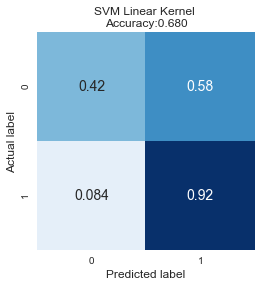

In [92]:
c = confusion_matrix(y_test, y_pred)
# Normalise
normed_c = (c.T / c.astype(np.float).sum(axis=1)).T
sns.heatmap(normed_c, 
            annot=True,
            annot_kws=dict(fontsize=14),
            #fmt='.0f',
            cbar=False,
            cmap=plt.cm.Blues,
            square=True,
            vmin = 0,
            #vmax = 1,
           )
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted label',fontsize=12)
plt.ylabel('Actual label', fontsize=12);

### Features Importance

<AxesSubplot:>

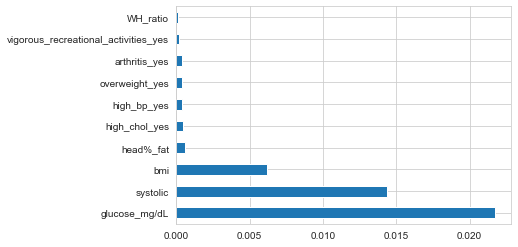

In [93]:
pd.Series(abs(svc_tuned.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')

#### Glucose Biochemistry Profile predict prediabetes/ undiagnose diabetes risk

Differences in plasma and serum glucose is not yet clearly revealed, measurement of glucose in plasma allows samples to be centrifuged promptly without waiting for the blood to clot, and values can be measured immediately to avoid glycolysis. Each hospital as well as health screening center should establish an accurate and same diagnostic method to facilitate a quick diagnosis of diabetes and manage people with diabetes efficiently.
   
   Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5069392/
   
Glucose Studies

A serum glucose measurement (commonly obtained on chemistry panels, using a red- or speckled-top tube) may be significantly lower than a plasma glucose measurement. Capillary whole blood measurements are not recommended for the diagnosis of diabetes mellitus, but they are valuable for assessment of patients in acute care situations.

The noted values for fasting glucose measurements are based on the level of glycemia at which retinopathy, a fairly pathognomonic diabetic complication, appears. (However, evidence suggests that retinopathy may occur even in prediabetes.) Fasting glucose measurements are not as predictive for indicating macrovascular risk as are post-glucose load values. However, there are no formal recommendations for using glucose tolerance tests for this purpose.

Impaired glucose tolerance
The World Health Organization (WHO) criteria for impaired glucose tolerance (IGT) are an FPG of less than 126 mg / dL (7 mmol / L), if measured, and a venous plasma glucose of 140 mg / dL to just below 200 mg / dL (≥7.8 to <11.1mmol / L) 2 hours after a 75-g glucose load with one intervening plasma glucose value at or above 200 mg / dL. The WHO notes that IGT is not a clinical entity but a risk factor for future diabetes and / or adverse outcomes and that the risk of future diabetes, premature death, and cardiovascular disease begins to increase at 2-hour plasma glucose levels below the IGT range.

These criteria are a better predictor of increased macrovascular risk than the ADA's current intermediate category of IFG or prediabetes. Presumably, patients with IFG are at increased risk for development of diabetes mellitus, but their risk for macrovascular disease does not appear to be the same as for patients with IGT (which is about the same as for patients with frank type 2 diabetes mellitus).

    Source :https://emedicine.medscape.com/article/117853-workup#c8